In [8]:
import pandas as pd
import numpy as np

dat=pd.read_csv('/home/maria/CrimeStats/data/avalik_1.csv',sep='\t')

tallinn=dat[dat['ValdLinnNimetus']=='Tallinn']
# Combine date and time columns into a single datetime column
# Parse the 'ToimKpv' as a date
tallinn['ToimKpv'] = pd.to_datetime(tallinn['ToimKpv'], errors='coerce')

# For 'ToimKell', we'll fill NaN values with '00:00' and then parse it as time
tallinn['ToimKell'] = tallinn['ToimKell'].fillna('00:00')

# Convert 'ToimKell' to a proper timedelta (hours and minutes)
tallinn['ToimKell'] = pd.to_timedelta(tallinn['ToimKell'] + ':00')  # Append ':00' to get HH:MM:SS format

# Create a new column by adding the date and time together
tallinn['ToimDatetime'] = tallinn['ToimKpv'] + tallinn['ToimKell']

tallinn = tallinn.dropna(subset=['ToimDatetime'])

# Set the index to the new datetime column
tallinn.set_index('ToimDatetime', inplace=True)

crimes_per_day = tallinn.resample('D').size()

ts_array = crimes_per_day.values.astype(np.float32).reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ts_scaled = scaler.fit_transform(ts_array)

/tmp/ipykernel_1949291/2842807213.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tallinn['ToimKpv'] = pd.to_datetime(tallinn['ToimKpv'], errors='coerce')
/tmp/ipykernel_1949291/2842807213.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tallinn['ToimKell'] = tallinn['ToimKell'].fillna('00:00')
/tmp/ipykernel_1949291/2842807213.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [5]:
from lib import train_cebra_time_learnable_siren

encoder = train_cebra_time_learnable_siren(
    data=ts_array,
    input_dim=1,
    hidden_dim=8,
    output_dim=3,
    num_layers=2,
    num_frequencies=3,
    omega_init_range=(1.0, 60.0),
    epochs=1000,
    batch_size=64,
    learning_rate=1e-3,
    model_path="crime_siren.pt"
)

[LearnableFreqSIREN] Epoch 0, Loss: 3.4397
[LearnableFreqSIREN] Epoch 100, Loss: 0.7902
[LearnableFreqSIREN] Epoch 200, Loss: 0.7159
[LearnableFreqSIREN] Epoch 300, Loss: 0.7515
[LearnableFreqSIREN] Epoch 400, Loss: 0.6522
[LearnableFreqSIREN] Epoch 500, Loss: 0.7038
[LearnableFreqSIREN] Epoch 600, Loss: 0.7210
[LearnableFreqSIREN] Epoch 700, Loss: 0.6754
[LearnableFreqSIREN] Epoch 800, Loss: 0.6828
[LearnableFreqSIREN] Epoch 900, Loss: 0.6528
Learnable frequency SIREN model saved to crime_siren.pt


Duplicate embeddings at indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 

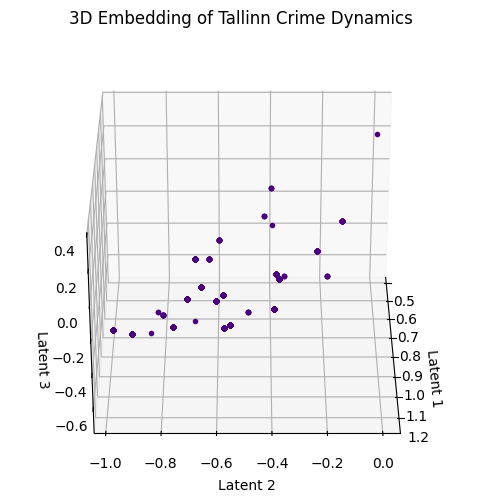

In [6]:
from lib import animate_embedding_3d_learnable_siren

animate_embedding_3d_learnable_siren(
    data=ts_scaled,
    encoder_path="crime_siren.pt",
    input_dim=1,
    hidden_dim=8,
    output_dim=3,
    num_layers=2,
    num_frequencies=3,
    omega_init_range=(1.0, 60.0),
    title="3D Embedding of Tallinn Crime Dynamics",
    save_path="tallinn_crime_rotation.mp4"
)


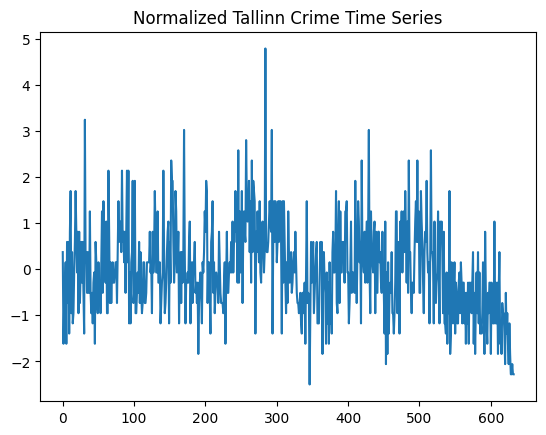

In [4]:
import matplotlib.pyplot as plt
plt.plot(ts_scaled)
plt.title("Normalized Tallinn Crime Time Series")
plt.show()


In [8]:
print(ts_scaled.shape)

(633, 1)
